In [7]:
train_data = pd.read_csv("//content//drive//MyDrive//fraudTrain.csv")
test_data = pd.read_csv("//content//drive//MyDrive//fraudTest.csv")

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
data_train = pd.read_csv("//content//drive//MyDrive//fraudTrain.csv")
data_test = pd.read_csv("//content//drive//MyDrive//fraudTest.csv")

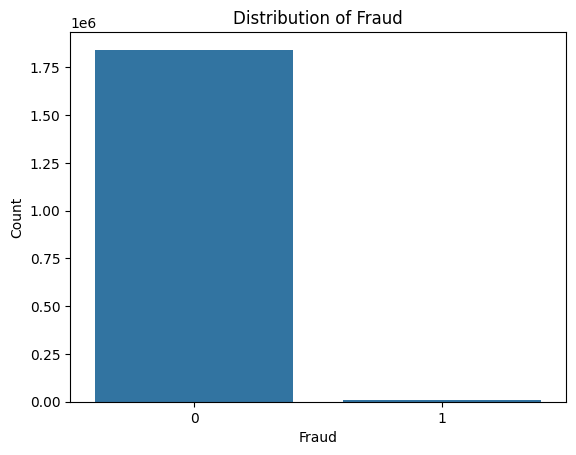

In [20]:
full_data = pd.concat([data_train, data_test])

# Remove rows with missing values
full_data = full_data.dropna()

# Class balance visualization
fraud_counts = full_data['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

In [21]:
fraud = full_data[full_data["is_fraud"] == 1]
not_fraud = full_data[full_data["is_fraud"] == 0].sample(fraud.shape[0])  # Undersample non-fraud data
data = pd.concat([fraud, not_fraud])

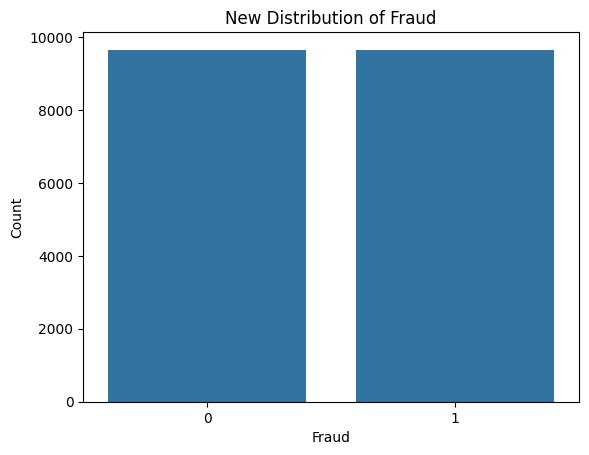

In [22]:
fraud_counts = data['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('New Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

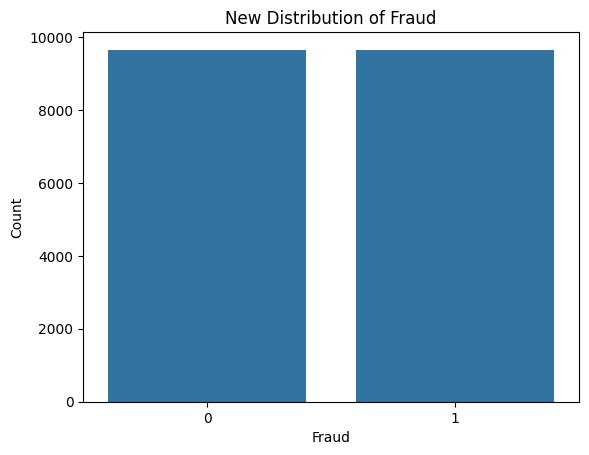

In [23]:
fraud_counts = data['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('New Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

In [24]:
unused_cols = ['Unnamed: 0', 'first', 'last', 'unix_time', 'street', 'gender', 'job', 'dob', 'city', 'state', 'trans_num', 'merchant']
data.drop(columns=unused_cols, inplace=True)

In [25]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['trans_day'] = data['trans_date_trans_time'].dt.day
data['trans_month'] = data['trans_date_trans_time'].dt.month
data['trans_year'] = data['trans_date_trans_time'].dt.year
data['trans_hour'] = data['trans_date_trans_time'].dt.hour
data.drop(columns=['trans_date_trans_time'], inplace=True)

In [26]:
encoder = LabelEncoder()
data['category'] = encoder.fit_transform(data['category'])
data['cc_num'] = encoder.fit_transform(data['cc_num'])

# Scale numeric features
scaler = StandardScaler()
data['amt'] = scaler.fit_transform(data[['amt']])
data['zip'] = scaler.fit_transform(data[['zip']])
data['city_pop'] = scaler.fit_transform(data[['city_pop']])

In [27]:
scaler = StandardScaler()
data[['amt', 'zip', 'city_pop']] = scaler.fit_transform(data[['amt', 'zip', 'city_pop']])

# Split the dataset into features (X) and target (y)
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
from sklearn.svm import SVC

In [30]:
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)  # Using RBF kernel
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

In [31]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

Accuracy: 0.49805749805749805
Precision: 0.497134670487106
Recall: 0.35958549222797925
F1 score: 0.4173180998196031
ROC AUC Score: 0.498021643058578


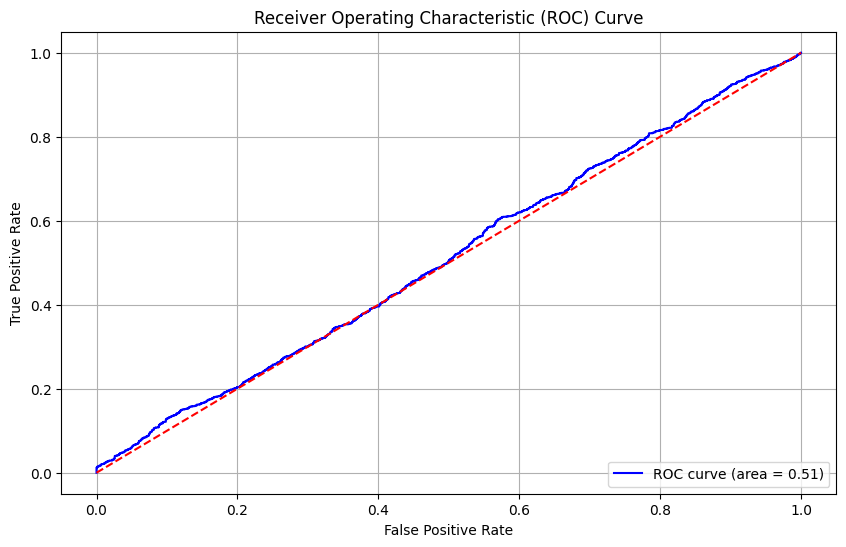

In [33]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Generate ROC Curve
y_prob = svm_model.decision_function(X_test)  # Get the decision function scores
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

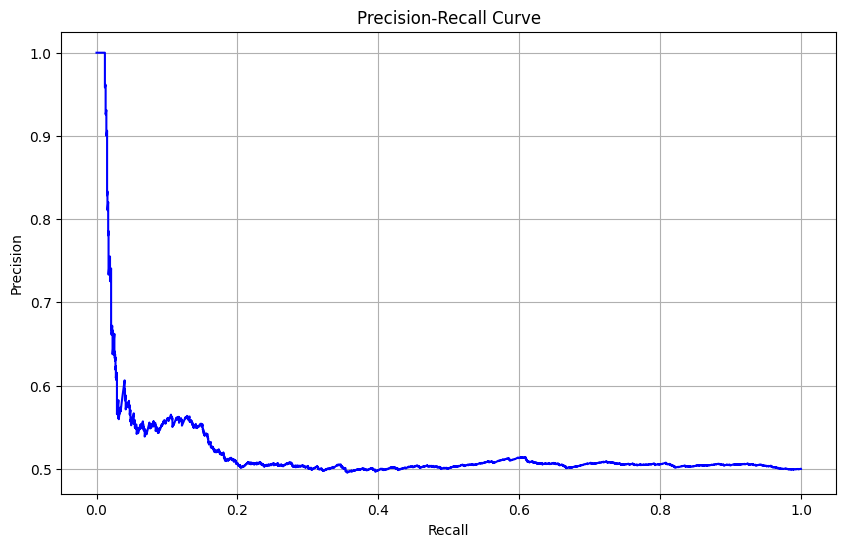

In [34]:
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

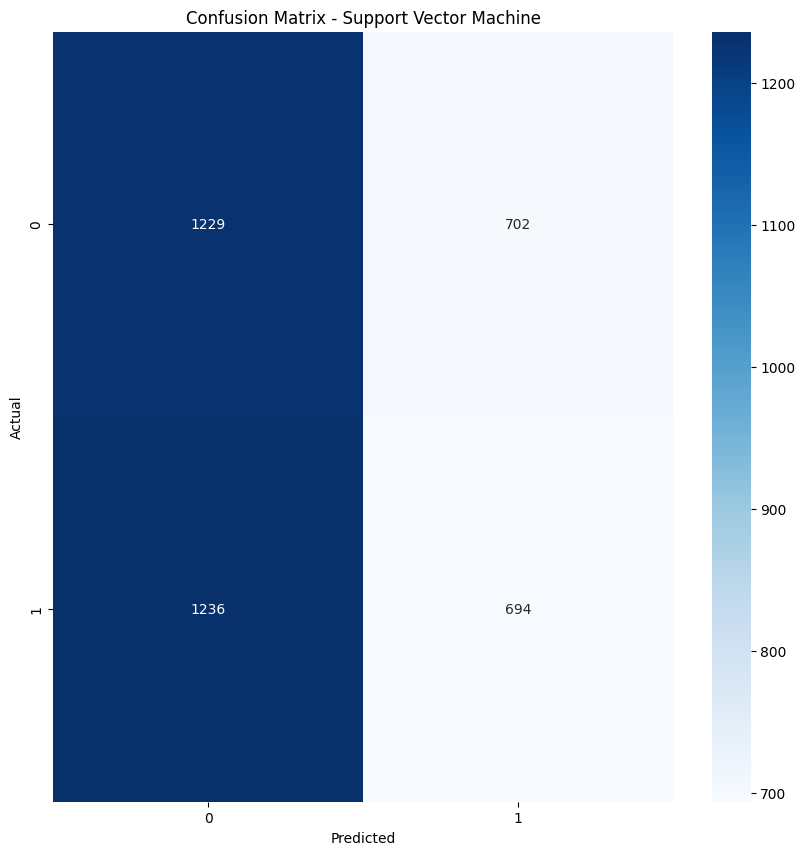

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()

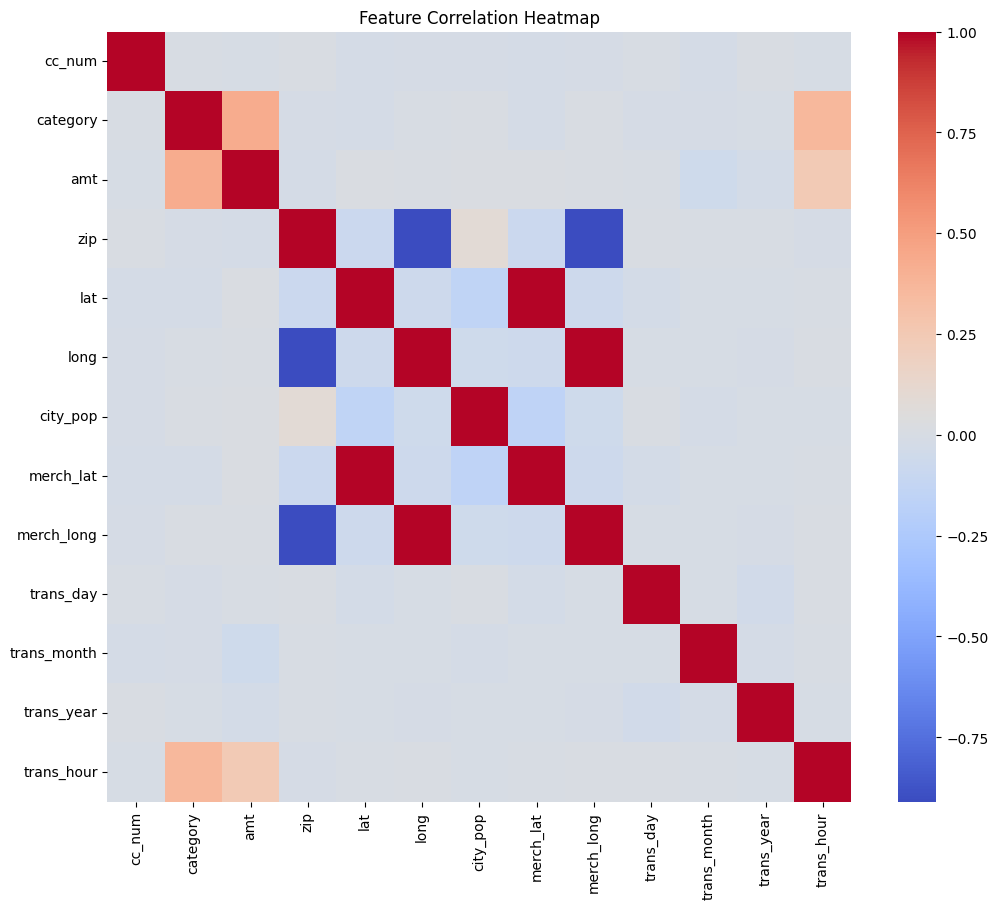

In [36]:
correlation_matrix = data.drop('is_fraud', axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()